In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [78]:
df = pd.read_csv('../datasets/diabetes_clean.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0,0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1


In [79]:
df.drop(['SkinThickness', 'Outcome', 'Pregnancies', 'Insulin', 'DiabetesPedigreeFunction', 'BloodPressure'], axis=1, inplace=True)
df.head()

,Glucose,BMI,Age
0,148.0,33.6,50.0
1,85.0,26.6,31.0
2,183.0,23.3,32.0
3,89.0,28.1,21.0
4,137.0,43.1,33.0


In [80]:
df.shape

(768, 3)

In [81]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : scalar or array-like, shape (n, )
        The data positions.
    
    s : scalar or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : color, sequence, or sequence of colors, optional
        The marker color. Possible values:
    
        - A single color format string.
        - A sequence of colors of length n.
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
    
        Note that *c* should not be a single 

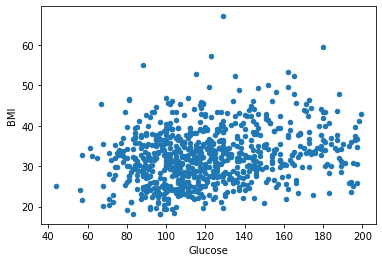

In [82]:
df.plot(kind='scatter', x='Glucose', y='BMI')

In [64]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'} or ndarray of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (row

In [93]:
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=25).fit(df[['Glucose', 'BMI']])

In [94]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [95]:
centroids

array([[ 94.50152905,  30.69327217],
       [127.83277592,  33.03578595],
       [171.18309859,  35.26690141]])

In [96]:
labels[0:10]

array([1, 0, 2, 0, 1, 1, 0, 1, 2, 1])

In [97]:
zipped = list(zip(np.array(df), labels))

In [98]:
zipped[0:4]

[(array([148. ,  33.6,  50. ,   1. ]), 1),
 (array([85. , 26.6, 31. ,  0. ]), 0),
 (array([183. ,  23.3,  32. ,   3. ]), 2),
 (array([89. , 28.1, 21. ,  0. ]), 0)]

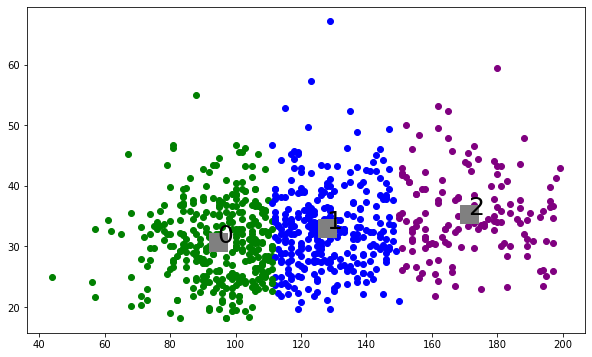

In [99]:
fig = plt.figure(figsize=(10,6))
colors = ['g', 'b', 'purple', 'r']
for element in zipped:
    plt.scatter(element[0][0], element[0][1], c = colors[(element[1] % len(colors))])
    
plt.scatter(centroids[:,0], centroids[:,1], c='grey', s=300, marker='s')
    
for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0], centroids[i][1]), fontsize=25)

In [100]:
df['Label'] = labels
df.head()

,Glucose,BMI,Age,Label
0,148.0,33.6,50.0,1
1,85.0,26.6,31.0,0
2,183.0,23.3,32.0,2
3,89.0,28.1,21.0,0
4,137.0,43.1,33.0,1


In [103]:
df_grouped =  df.groupby('Label')[['Age', 'BMI']].mean()
df_grouped

,Age,BMI
Label,,
0,30.140673,30.693272
1,34.347826,33.035786
2,38.049296,35.266901


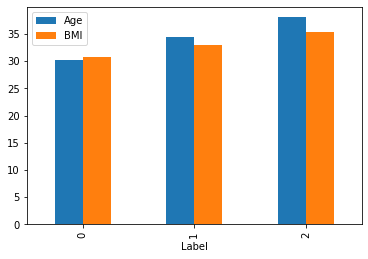

In [104]:
df_grouped.plot(kind='bar')